Datos asistenciales y situación epidemiológica (formato CSV) de
https://datos.gob.es/catalogo/a16003011-evolucion-del-coronavirus-covid-19-en-euskadi1

De los datos asistenciales se hace uso de:
- 01.csv - Evolución nº de ingresados en planta
- 04.csv - Evolución nº de ingresados en UCI

De los datos de situación epidemiológica se hace uso de:
- 02.csv - Casos positivos nuevos en Euskadi (test PCRs+Ag)
- 08.csv - Casos positivos fallecidos en Euskadi por fecha de fallecimiento
- 09.csv - DISTRIBUCIÓN DE LOS NUEVOS CASOS PCR POSITIVOS SEGÚN SEXO Y GRUPOS DE EDAD;

In [1]:
# Cargar los datos
%run load_data.py

Cargando: ingresos_en_planta (datos-asistenciales/01.csv)
Cargando: ingresos_en_UCI (datos-asistenciales/04.csv)
Cargando: positive_cases_by_region (situacion-epidemiologica/02.csv)
Cargando: positive_cases_by_gender_and_age (situacion-epidemiologica/09.csv)
Cargando: deaths (situacion-epidemiologica/08.csv)
Data available in DATA object


In [2]:
import matplotlib.pyplot as plt
import matplotlib.style as plt_style

## Vista general de casos positivos

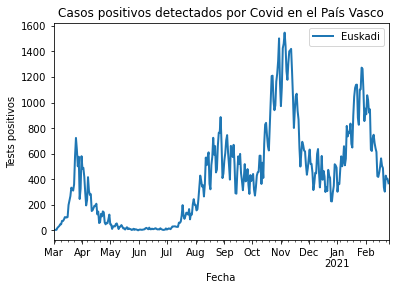

In [3]:
DATA['positive_cases_by_region'].plot(kind='line',x='fecha',y='casos', label='Euskadi', linewidth=2)
plt.title("Casos positivos detectados por Covid en el País Vasco")
plt.xlabel("Fecha")
plt.ylabel("Tests positivos")
plt.show()

## Incidencia acumulada por territorio hitórico

## Casos positivos por edad y género según número de población

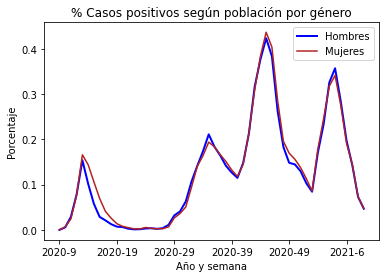

In [6]:
poblacion_mujeres = 1130114
poblacion_hombres = 1059376

df = DATA['positive_cases_by_gender_and_age']

df['year'] = pd.DatetimeIndex(df['fecha']).year
df['week'] = pd.DatetimeIndex(df['fecha']).week

df['week_of_year'] = df['year'].map(str) + '-' + df['week'].map(str)

DATA['positive_cases_by_gender_and_age'] = df

df_grouped = df.groupby(['year', 'week', 'week_of_year']).sum()

df_grouped["hombres_per"] = df_grouped["hombres"] * 100 / poblacion_hombres
df_grouped["mujeres_per"] = df_grouped["mujeres"] * 100 / poblacion_mujeres

ax = plt.gca()
plt.title("% Casos positivos según población por género")



df_grouped.reset_index().plot(kind='line',x='week_of_year',y='hombres_per', color='blue', ax=ax, label="Hombres", linewidth=2)
df_grouped.reset_index().plot(kind='line',x='week_of_year',y='mujeres_per', color='firebrick', ax=ax, label="Mujeres", linewidth=1.5)

plt.xlabel("Año y semana")
plt.ylabel("Porcentaje")

plt.show()

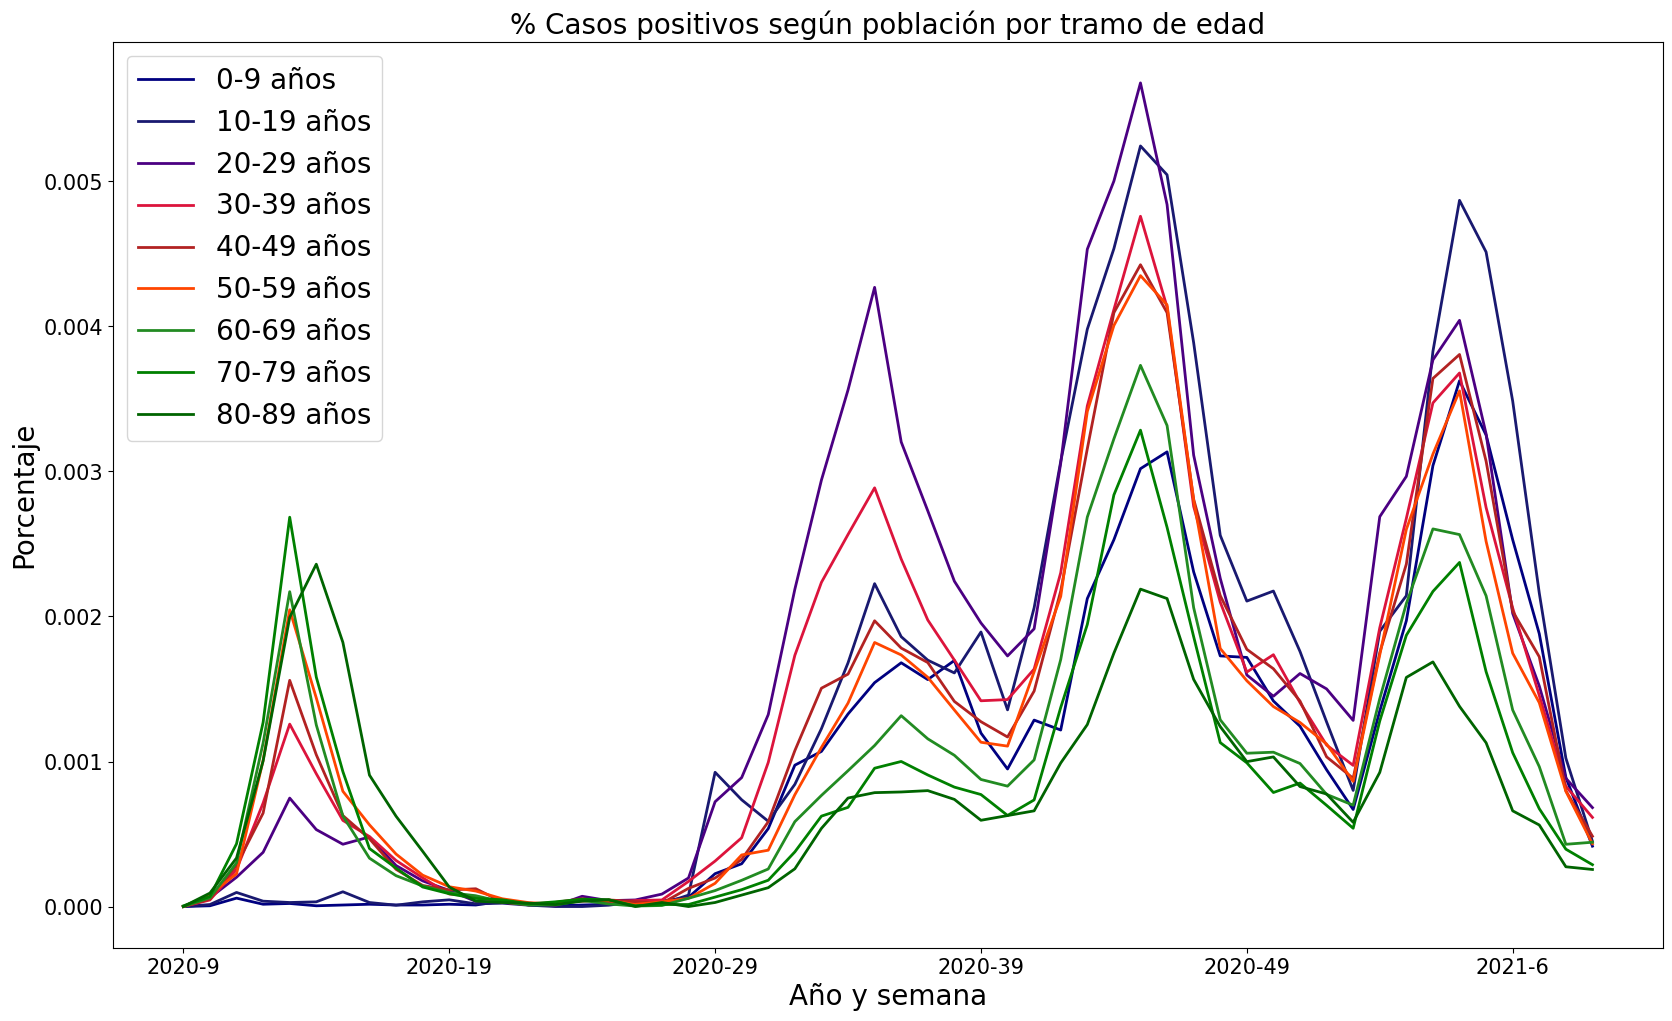

In [7]:
poblacion_0_9 = 189786
poblacion_10_19 = 216036
poblacion_20_29 = 197911
poblacion_30_39 = 242454
poblacion_40_49 = 350695
poblacion_50_59 = 337211
poblacion_60_69 = 281888
poblacion_70_79 = 214932
poblacion_80_89 = 215190
poblacion_90_99 = 31902
poblacion_mayor_de_99 = 581

plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

ax = plt.gca()
plt.title("% Casos positivos según población por tramo de edad", fontsize=20)

df_grouped['0-9_rel'] = df_grouped['0-9'] / poblacion_0_9
df_grouped['10-19_rel'] = df_grouped['10-19'] / poblacion_10_19
df_grouped['20-29_rel'] = df_grouped['20-29'] / poblacion_20_29
df_grouped['30-39_rel'] = df_grouped['30-39'] / poblacion_30_39
df_grouped['40-49_rel'] = df_grouped['40-49'] / poblacion_40_49
df_grouped['50-59_rel'] = df_grouped['50-59'] / poblacion_50_59
df_grouped['60-69_rel'] = df_grouped['60-69'] / poblacion_60_69
df_grouped['70-79_rel'] = df_grouped['70-79'] / poblacion_70_79
df_grouped['80-89_rel'] = df_grouped['80-89'] / poblacion_80_89
#df_grouped['90-99_rel'] = df_grouped['90-99'] / poblacion_90_99

df_grouped.reset_index().plot(kind='line',x='week_of_year',y='0-9_rel', color='navy', ax=ax, label="0-9 años", linewidth=2)
df_grouped.reset_index().plot(kind='line',x='week_of_year',y='10-19_rel', color='midnightblue', ax=ax, label="10-19 años", linewidth=2)
df_grouped.reset_index().plot(kind='line',x='week_of_year',y='20-29_rel', color='indigo', ax=ax, label="20-29 años", linewidth=2)
df_grouped.reset_index().plot(kind='line',x='week_of_year',y='30-39_rel', color='crimson', ax=ax, label="30-39 años", linewidth=2)
df_grouped.reset_index().plot(kind='line',x='week_of_year',y='40-49_rel', color='firebrick', ax=ax, label="40-49 años", linewidth=2)
df_grouped.reset_index().plot(kind='line',x='week_of_year',y='50-59_rel', color='orangered', ax=ax, label="50-59 años", linewidth=2)
df_grouped.reset_index().plot(kind='line',x='week_of_year',y='60-69_rel', color='forestgreen', ax=ax, label="60-69 años", linewidth=2)
df_grouped.reset_index().plot(kind='line',x='week_of_year',y='70-79_rel', color='green', ax=ax, label="70-79 años", linewidth=2)
df_grouped.reset_index().plot(kind='line',x='week_of_year',y='80-89_rel', color='darkgreen', ax=ax, label="80-89 años", linewidth=2)
#df_grouped.reset_index().plot(kind='line',x='week_of_year',y='90-99_rel', color='lime', ax=ax, label="90-99 años", linewidth=2)

plt.legend(fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Año y semana", fontsize=20)
plt.ylabel("Porcentaje", fontsize=20)
plt.show()

## Incidencia acumulada

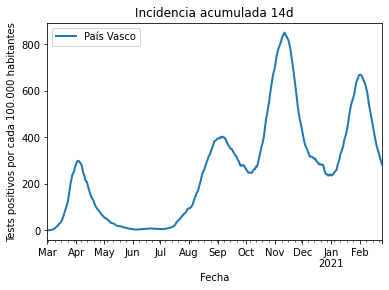

In [4]:
DATA['positive_cases_by_region'].plot(kind='line',x='fecha',y='euskadi_incidencia_acum_14d', label='País Vasco', linewidth=2)
plt.title("Incidencia acumulada 14d")
plt.xlabel("Fecha")
plt.ylabel("Tests positivos por cada 100.000 habitantes")
plt.show()

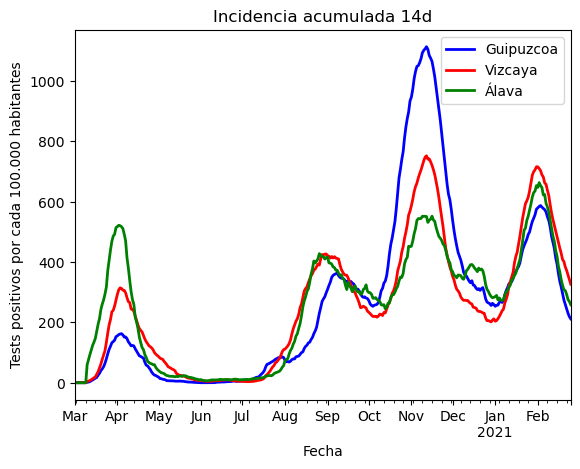

In [20]:
ax = plt.gca()
plt.title("Incidencia acumulada 14d")

DATA['positive_cases_by_region'].plot(kind='line',x='fecha',y='gipuzkoa_incidencia_acum_14d', color='blue', ax=ax, label="Guipuzcoa", linewidth=2)
DATA['positive_cases_by_region'].plot(kind='line',x='fecha',y='bizkaia_incidencia_acum_14d', color='red', ax=ax, label="Vizcaya", linewidth=2)
DATA['positive_cases_by_region'].plot(kind='line',x='fecha',y='araba_incidencia_acum_14d', color='green', ax=ax, label="Álava", linewidth=2)
plt.xlabel("Fecha")
plt.ylabel("Tests positivos por cada 100.000 habitantes")
plt.show()

## Ingresos en planta + UCI

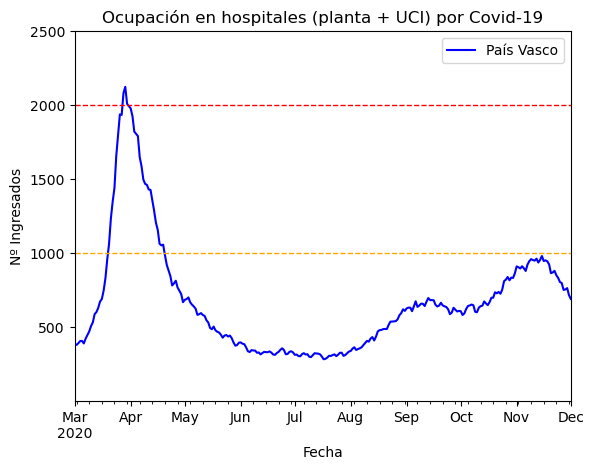

In [35]:
merged_df = pd.merge(DATA['ingresos_en_planta'], DATA['ingresos_en_UCI'], on="fecha")

merged_df["total"] = merged_df["total_x"] + merged_df["total_y"]
merged_df["guipuzcoa"] = merged_df["guipuzcoa_x"] + merged_df["guipuzcoa_y"]
merged_df["vizcaya"] = merged_df["vizcaya_x"] + merged_df["vizcaya_y"]
merged_df["alava"] = merged_df["alava_x"] + merged_df["alava_y"]

ax = plt.gca()
plt.title("Ocupación en hospitales (planta + UCI) por Covid-19")

merged_df.plot(kind='line',x='fecha',y='total', color='blue', ax=ax, label="País Vasco")
plt.ylim(ymin=1, ymax=2500)
plt.axhline(y=1000, color='orange', linestyle='dashed', linewidth=1)
plt.axhline(y=2000, color='red', linestyle='dashed', linewidth=1)

plt.xlabel("Fecha")
plt.ylabel("Nº Ingresados")

plt.show()

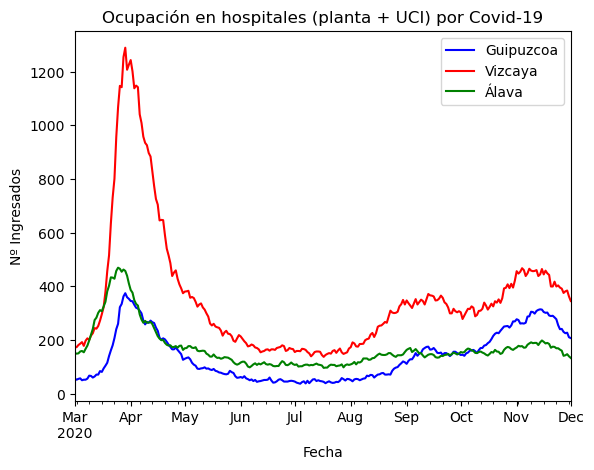

In [36]:
ax = plt.gca()
plt.title("Ocupación en hospitales (planta + UCI) por Covid-19")

merged_df.plot(kind='line',x='fecha',y='guipuzcoa', color='blue', ax=ax, label="Guipuzcoa")
merged_df.plot(kind='line',x='fecha',y='vizcaya', color='red', ax=ax, label="Vizcaya")
merged_df.plot(kind='line',x='fecha',y='alava', color='green', ax=ax, label="Álava")

plt.xlabel("Fecha")
plt.ylabel("Nº Ingresados")

plt.show()

## Ingresos planta VS ingresos UCI

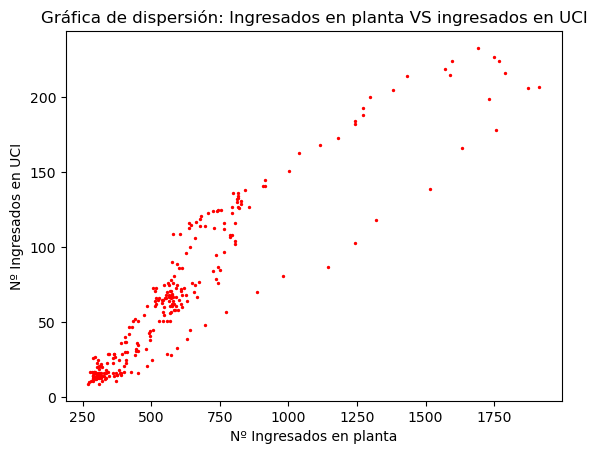

In [38]:
# Gráfica de dispersión
import matplotlib.pyplot as plt

ax = plt.gca()
ax.scatter( DATA['ingresos_en_planta']['total'], DATA['ingresos_en_UCI']['total'], color='r', s=2)

ax.set_title('Gráfica de dispersión: Ingresados en planta VS ingresados en UCI')
plt.xlabel('Nº Ingresados en planta')
plt.ylabel('Nº Ingresados en UCI')
plt.show()

<Figure size 640x480 with 0 Axes>

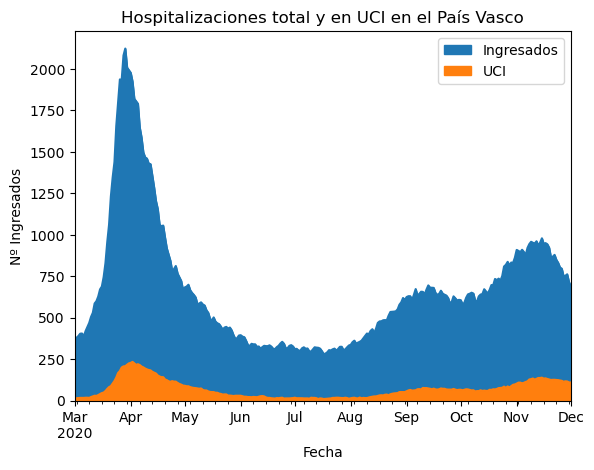

In [39]:
plt.figure()
ax = merged_df.plot.area(x='fecha', y='total', label = "Ingresados")
DATA['ingresos_en_UCI'].plot.area(x='fecha', y='total',ax=ax, label = "UCI")
plt.title("Hospitalizaciones total y en UCI en el País Vasco")
plt.xlabel("Fecha")
plt.ylabel("Nº Ingresados")
plt.show()

<Figure size 640x480 with 0 Axes>

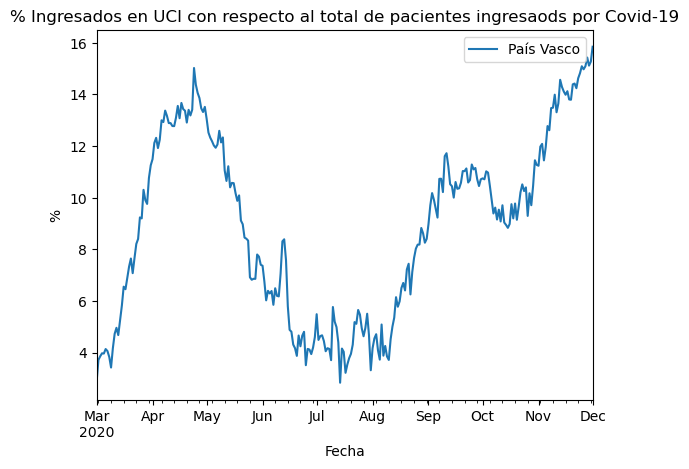

In [43]:
plt.figure()
merged_df['uci_percentage'] = 100 * merged_df['total_y'] / merged_df['total']
ax = merged_df.plot(x='fecha', y='uci_percentage', label = "País Vasco")
plt.title("% Ingresados en UCI con respecto al total de pacientes ingresaods por Covid-19")
plt.xlabel("Fecha")
plt.ylabel("%")
plt.show()

## Fallecimientos

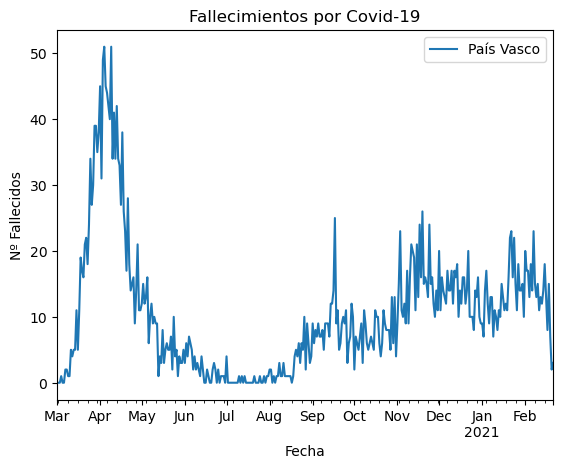

In [44]:
plt_style.use('default') 
DATA['deaths'].plot(kind='line',x='fecha',y='fallecidos', label='País Vasco')
plt.title("Fallecimientos por Covid-19")
plt.xlabel("Fecha")
plt.ylabel("Nº Fallecidos")
plt.show()

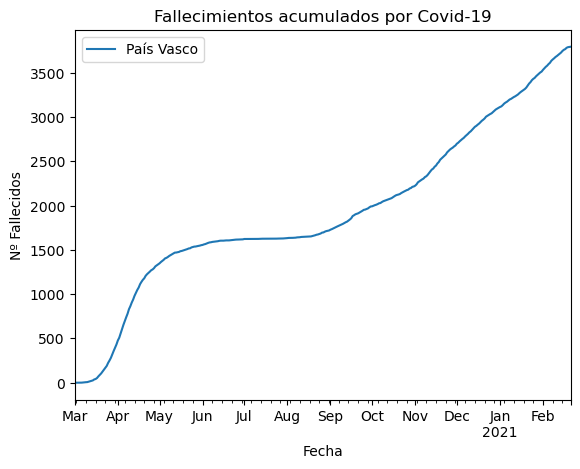

In [45]:
# fallecimientos acumulados
DATA['deaths']['acum_value'] = DATA['deaths']['fallecidos'].cumsum()
plt_style.use('default') 
DATA['deaths'].plot(kind='line',x='fecha',y='acum_value', label='País Vasco')
plt.title("Fallecimientos acumulados por Covid-19")
plt.xlabel("Fecha")
plt.ylabel("Nº Fallecidos")
plt.show()